In [12]:
# SQL-challenge BONUS
# Employee Database
# By: Jack Cohen

# Import Dependencies

import pandas as pd
from sqlalchemy import create_engine
import psycopg2
from config import pwd
import matplotlib.pyplot as plt


In [13]:
# Connect to Database

conn = psycopg2.connect(
    host="localhost",
    database="employee_db",
    user="postgres",
    password=pwd)


In [14]:
# Query Employee Data

emp = pd.read_sql('SELECT * FROM "Employees"',conn)
salaries = pd.read_sql('SELECT * FROM "Salaries"',conn)
title = pd.read_sql('SELECT * FROM "Titles"',conn)


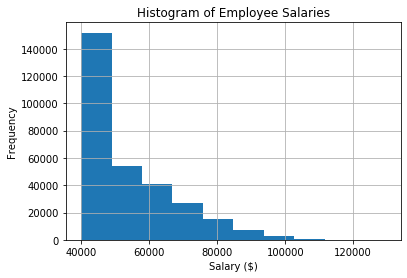

In [15]:
# Histogram of salary ranges for employees

salary_count = salaries['salary'].value_counts()
sal = salaries.hist('salary');
for ax in sal.flatten():
    ax.set_xlabel("Salary ($)")
    ax.set_ylabel("Frequency")
    ax.set_title("Histogram of Employee Salaries")


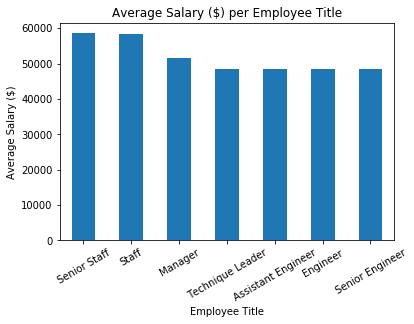

In [17]:
# Bar chart of average salary by title

df = pd.merge(salaries,emp,on='emp_no')
df = pd.merge(df,title,left_on='emp_title_id',right_on='title_id')
df = df[['emp_no','title','salary']]
final = df.groupby(['title']).describe()['salary']['mean'].sort_values(ascending=False)

ax = final.plot.bar(x='Title',y='salary',rot=30);
ax.set_xlabel('Employee Title')
ax.set_ylabel('Average Salary ($)')
ax.set_title('Average Salary ($) per Employee Title');
